In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import warnings
import itertools
warnings.filterwarnings("ignore")

In [13]:
#df_wine = pd.read_csv('winequality-red.csv')
#url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url = 'http://ia.azc.uam.mx/sourcecode/winequality-red.csv'
df_wine = pd.read_csv(url, sep=';')
df_wine.head(5)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [14]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

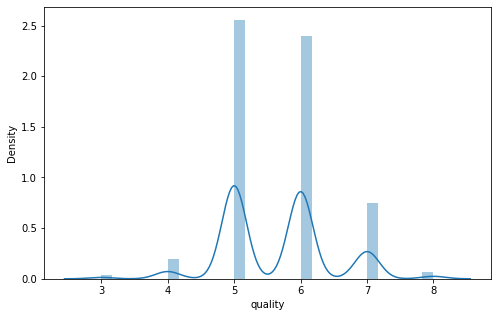

In [16]:
plt.figure(figsize=(8,5))
plt.tight_layout()
sns.distplot(df_wine['quality'])

In [19]:
X = df_wine[list(df_wine.columns)[:-1]]
Y=df_wine['quality']
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)

In [20]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
coef_dfwine = pd.DataFrame(regressor.coef_, X.columns, columns=['Coeficiente'])
coef_dfwine

Coeficiente
fixed acidity            0.041284
volatile acidity        -1.149528
citric acid             -0.177927
residual sugar           0.027870
chlorides               -1.873407
free sulfur dioxide      0.002684
total sulfur dioxide    -0.002777
density                -31.516666
pH                      -0.254486
sulphates                0.924040
alcohol                  0.267797

In [28]:
y_pred = regressor.predict(x_test)

In [29]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 0.6200574149384273


In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.46963309286611177


In [33]:
print("Coeficiente de determinacion R^2 -R al cuadrado-: " , regressor.score(X,Y))

Coeficient de determinacion R^2 -R al cuadrado-:  0.3593724283394687


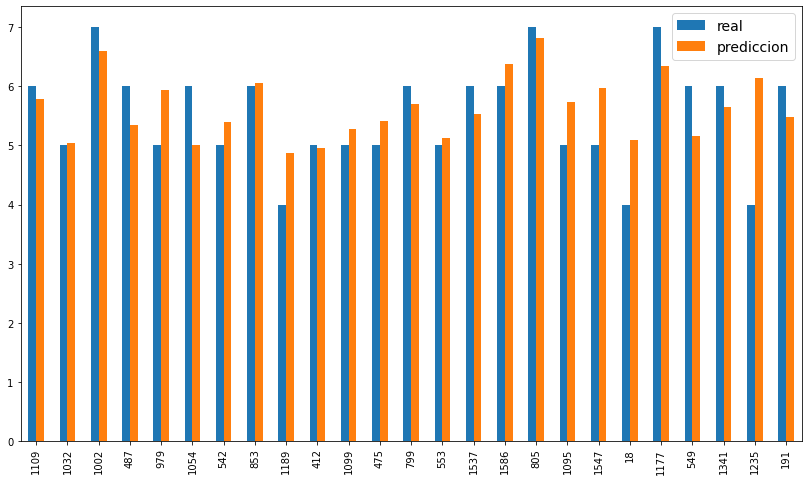

In [38]:
df = pd.DataFrame({'real': y_test, 'prediccion': y_pred})
df1 = df.head(25)
df1.plot(kind='bar', figsize=(14,8))
plt.legend(loc=1, prop={'size':14})
plt.show()